# Will I get a first in this module?

Our problem is simple.

**inputs**:
- lecture attendance percentage;
- hours spent on coursework;
- hours spent on exam



**outputs**:
- will i get a first? yes / no


We want to now build a model that can predict this, given some new input data.

### Downloading data

In [1]:
!wget -O lectures_percentage.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt
!wget -O hours_cw.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/hours_cw.txt
!wget -O hours_exam.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/hours_exam.txt

!wget -O labels.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/labels.txt

--2026-02-11 12:10:32--  https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt [following]
--2026-02-11 12:10:32--  https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12500 (12K) [text/plain]
Saving to: ‘lectures_percentage.txt’

lectures_percentage 100%[===================>]  12.21K  --.-KB/s    in 0s      

2026-02-11 12:10:3

In [2]:
!ls

hours_cw.txt  hours_exam.txt  labels.txt  lectures_percentage.txt  sample_data


### Import relevant modules

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load the data and normalise it to range 0-1

In [16]:
# checking data attributes

hours_cw = np.loadtxt('hours_cw.txt')
hours_exam = np.loadtxt('hours_exam.txt')
lectures_percentage = np.loadtxt('lectures_percentage.txt')

labels = np.loadtxt('labels.txt')

print('cw min/max: ', np.amin(hours_cw), '|', np.amax(hours_cw))
print('exam min/max: ', np.amin(hours_exam), '|', np.amax(hours_exam))
print('lectures min/max: ', np.amin(lectures_percentage), '|', np.amax(lectures_percentage))

print('labels min/max: ', np.amin(labels), '|', np.amax(labels))

cw min/max:  0.0 | 10.0
exam min/max:  0.05 | 9.97
lectures min/max:  0.3 | 1.0
labels min/max:  0.0 | 1.0


In [65]:
# normalising or scaling

hours_cw_norm = hours_cw / np.ceil(np.amax(hours_cw))
hours_exam_norm = hours_exam / np.ceil(np.amax(hours_exam))
lectures_percentage_norm = lectures_percentage / np.ceil(np.amax(lectures_percentage))

x1 = hours_cw_norm
x2 = hours_exam_norm
x3 = lectures_percentage_norm

y = labels

### Constrct input x and output y

In [66]:
x1_final = np.expand_dims(x1, axis=-1)
x2_final = np.expand_dims(x2, axis=-1)
x3_final = np.expand_dims(x3, axis=-1)

x = np.concatenate([x1_final, x2_final, x3_final], axis=-1)
print('X shape: ', x.shape)

print('Y shape: ', y.shape)

X shape:  (500, 3)
Y shape:  (500,)


### Split into train, val and test sets (ratios 0.6, 0.2, 0.2)

In [67]:
# Shuffle the data randomly
indexes = np.random.permutation(len(x))
x_final = x[indexes]
y_final = y[indexes]

# split into train, val and test sets
train_val_test_ratio = [0.6, 0.2, 0.2]

train_index_start = 0
train_index_end = int(train_val_test_ratio[0] * len(x))

val_index_start = train_index_end
val_index_end = val_index_start + int(train_val_test_ratio[1] * len(x))

test_index_start = val_index_end
test_index_end = test_index_start + int(train_val_test_ratio[2] * len(x))


x_train, y_train = x_final[train_index_start:train_index_end], y_final[train_index_start:train_index_end]

x_val, y_val = x_final[val_index_start:val_index_end], y_final[val_index_start:val_index_end]

x_test, y_test = x_final[test_index_start:test_index_end], y_final[test_index_start:test_index_end]


print("Train:", x_train.shape, y_train.shape)
print("Val:", x_val.shape, y_val.shape)
print("Test: ", x_test.shape,  y_test.shape)


Train: (300, 3) (300,)
Val: (100, 3) (100,)
Test:  (100, 3) (100,)


### Build, train and evaluate a perceptron for this task

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8441 - loss: 0.5207 - val_accuracy: 0.8000 - val_loss: 0.5213
Epoch 2/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8208 - loss: 0.4919 - val_accuracy: 0.8000 - val_loss: 0.4690
Epoch 3/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8319 - loss: 0.4277 - val_accuracy: 0.8000 - val_loss: 0.4286
Epoch 4/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7980 - loss: 0.4252 - val_accuracy: 0.8000 - val_loss: 0.4023
Epoch 5/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8267 - loss: 0.3722 - val_accuracy: 0.8700 - val_loss: 0.3776
Epoch 6/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8027 - loss: 0.3668 - val_accuracy: 0.8200 - val_loss: 0.3563
Epoch 7/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8396 - loss: 0.3241 - val_accuracy: 0.8800 - val_loss: 0.3439
Epoch 8/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8854 - loss: 0.3117 - val_accuracy: 0.8700 - val_loss

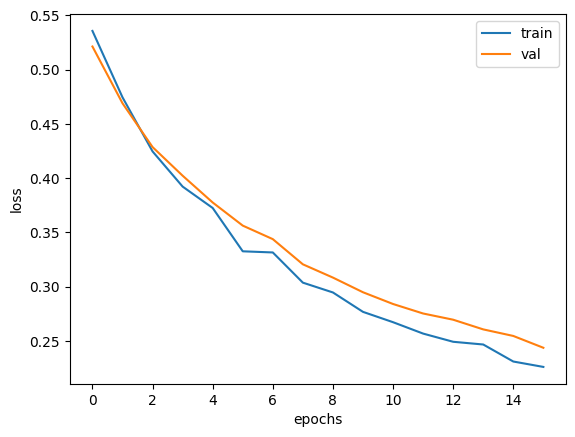

In [68]:
inputs = tf.keras.Input(shape=(3,))
perceptron = tf.keras.layers.Dense(1, activation="sigmoid")(inputs)
outputs = perceptron

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=16,
    batch_size=16,
    validation_data=(x_val, y_val),
    verbose=1
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')


# evlauate

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('\n ------------------------------- ')
print(f"Test accuracy: {acc:.3f}")
print('------------------------------- \n')

### Build, train and evaluate a single-layer neural network for this task (hidden layer activations should be relu)

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8053 - loss: 0.5564 - val_accuracy: 0.8000 - val_loss: 0.4272
Epoch 2/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8460 - loss: 0.3297 - val_accuracy: 0.8000 - val_loss: 0.3272
Epoch 3/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8162 - loss: 0.2681 - val_accuracy: 0.9300 - val_loss: 0.2496
Epoch 4/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9362 - loss: 0.2207 - val_accuracy: 0.9300 - val_loss: 0.1966
Epoch 5/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9113 - loss: 0.1815 - val_accuracy: 0.9000 - val_loss: 0.1893
Epoch 6/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9355 - loss: 0.1534 - val_accuracy: 0.9300 - val_loss: 0.1625
Epoch 7/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9429 - loss: 0.1306 - val_accuracy: 0.9000 - val_loss: 0.1785
Epoch 8/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9596 - loss: 0.1103 - val_accuracy: 0.9500 - val_loss

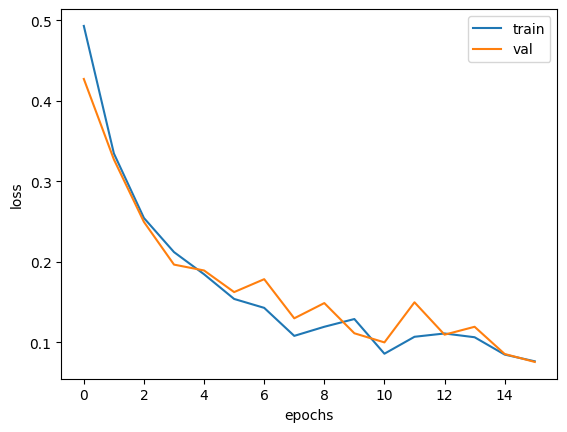

In [69]:
inputs = tf.keras.Input(shape=(3,))
hidden_layer_1 = tf.keras.layers.Dense(16, activation="relu")(inputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=16,
    batch_size=16,
    validation_data=(x_val, y_val),
    verbose=1
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')


# evlauate

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('\n ------------------------------- ')
print(f"Test accuracy: {acc:.3f}")
print('------------------------------- \n')

### Build, train and evaluate a deep neural network for this task (hidden layer activations should be relu)

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7633 - loss: 0.5868 - val_accuracy: 0.8000 - val_loss: 0.5034
Epoch 2/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7951 - loss: 0.4725 - val_accuracy: 0.8000 - val_loss: 0.4116
Epoch 3/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8286 - loss: 0.3682 - val_accuracy: 0.8000 - val_loss: 0.3600
Epoch 4/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8269 - loss: 0.2875 - val_accuracy: 0.8900 - val_loss: 0.2885
Epoch 5/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8808 - loss: 0.2459 - val_accuracy: 0.8700 - val_loss: 0.3104
Epoch 6/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8364 - loss: 0.3085 - val_accuracy: 0.8900 - val_loss: 0.2611
Epoch 7/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8903 - loss: 0.2104 - val_accuracy: 0.9500 - val_loss: 0.2034
Epoch 8/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9342 - loss: 0.1830 - val_accuracy: 0.9000 - val_loss

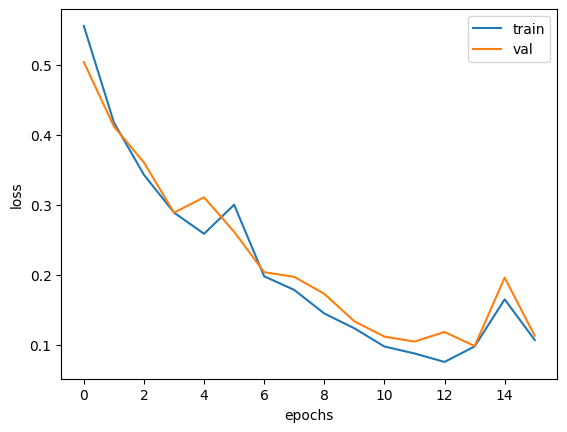

In [70]:
inputs = tf.keras.Input(shape=(3,))
hidden_layer_1 = tf.keras.layers.Dense(16, activation="relu")(inputs)
hidden_layer_2 = tf.keras.layers.Dense(32, activation="relu")(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(16, activation="relu")(hidden_layer_2)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=16,
    batch_size=16,
    validation_data=(x_val, y_val),
    verbose=1
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')


# evlauate

loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('\n ------------------------------- ')
print(f"Test accuracy: {acc:.3f}")
print('------------------------------- \n')

### Comment on the differences and performance of each

- Overfitting or underfitting and how you diagnosed and solved it in the deep neural network
- Which model performs best
- Put your expected details into one model and see if you will get a first

In [77]:
# putting expected details in to model

my_hours_cw = 8
my_hours_exam = 6
my_lectures_percentage = 0.9

my_x1 = my_hours_cw / np.ceil(np.amax(hours_cw))
my_x2 = my_hours_exam / np.ceil(np.amax(hours_exam))
my_x3 = my_lectures_percentage / np.ceil(np.amax(lectures_percentage))

my_x1_final = np.expand_dims(my_x1, axis=-1)
my_x2_final = np.expand_dims(my_x2, axis=-1)
my_x3_final = np.expand_dims(my_x3, axis=-1)

my_x = np.concatenate([my_x1_final, my_x2_final, my_x3_final], axis=-1)
my_x = np.expand_dims(my_x, axis=0)

my_y_pred = model(my_x)

print('My probability of getting a first: ', np.array(my_y_pred))
print('My final outcome for getting a first: ', np.round(my_y_pred))


My probability of getting a first:  [[0.68115294]]
My final outcome for getting a first:  [[1.]]


In [ ]:
# for solving overfitting, use dropout layers (rate=0.5) in between hidden layers e.g., as below

# inputs = tf.keras.Input(shape=(3,))

# hidden_layer_1 = tf.keras.layers.Dense(16, activation="relu")(inputs)
# dropout_1 = tf.keras.layers.Dropout(0.5)(hidden_layer_1)

# hidden_layer_2 = tf.keras.layers.Dense(32, activation="relu")(dropout_1)
# dropout_2 = tf.keras.layers.Dropout(0.5)(hidden_layer_2)

# hidden_layer_3 = tf.keras.layers.Dense(16, activation="relu")(dropout_2)

# outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer_1)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# model.summary()



# for underfitting, increase number of model parameters